In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes

In [2]:
z_ret = np.load("fdwidth_0.1/output/eta_1e-3/retarded_energies.npy")
energies = z_ret.real

/users/ajayaraj/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


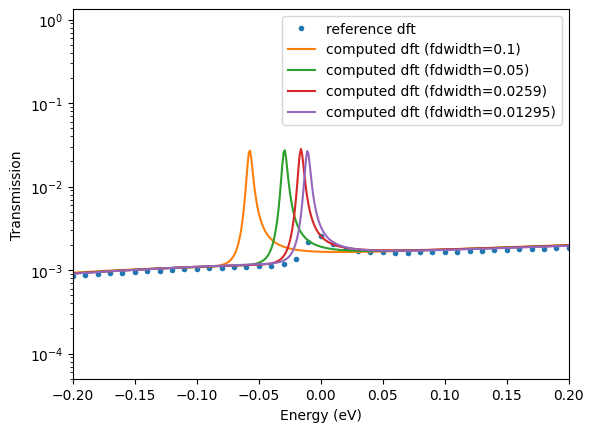

Peak positions (in eV):
fdwidth=0.1: -0.05700+0.00100j
fdwidth=0.05: -0.02900+0.00100j
fdwidth=0.0259: -0.01600+0.00100j
fdwidth=0.01295: -0.01100+0.00100j


In [3]:
# Load the reference LCAO transmission data
Eref, Tref_dft = np.load("reference/ET_dft.npy")

# Plot the reference DFT data
plt.plot(Eref, Tref_dft, '.', label="reference dft")

# Define the fdwidth values to plot
fdwidths = ['0.1', '0.05', '0.0259', '0.01295']

# Dictionary to store peak positions
peak_positions = {}

# Loop over each fdwidth and plot the computed transmission data
for fdwidth in fdwidths:
    file_path = f"fdwidth_{fdwidth}/output/dft_transmission.npy"
    E, T = np.load(file_path)
    plt.plot(E, T, label=f"computed dft (fdwidth={fdwidth})")

    # Find the energy corresponding to the maximum transmission
    peak_idx = np.argmax(T)
    peak_energy = E[peak_idx]
    peak_positions[fdwidth] = peak_energy

# Set the y-axis to a logarithmic scale to better visualize the transmission data
plt.yscale("log")
plt.xlim(-0.2, 0.2)
plt.ylim(bottom=5e-5)

# Add legend and labels
plt.legend()
plt.xlabel("Energy (eV)")
plt.ylabel("Transmission")

# Show the plot
plt.show()

# Print the peak positions for reference
print("Peak positions (in eV):")
for fdwidth, peak in peak_positions.items():
    print(f"fdwidth={fdwidth}: {peak:.5f}")


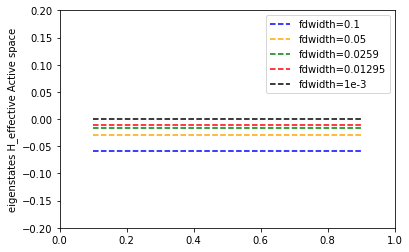

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the fdwidth values to plot
fdwidths = [0.1, 0.05, 0.0259, 0.01295, '1e-3']

# Define a colormap or custom colors for the fdwidth values
colors = ['blue', 'orange', 'green', 'red', 'black']  # Example: one color per fdwidth

# Loop over each fdwidth and plot the computed eigenvalues as horizontal lines
for idx, fdwidth in enumerate(fdwidths):
    file_path = f"fdwidth_{fdwidth}/output/eigvals_Heff.npy"
    eigvals = np.load(file_path)

    # Plot eigenvalues as horizontal lines with a unique color
    for eig in eigvals:
        plt.axhline(eig, xmin=0.1, xmax=0.9, linestyle='--', color=colors[idx],
                    label=f"fdwidth={fdwidth}" if eig == eigvals[0] else "")

plt.ylabel("eigenstates H_effective Active space")
plt.legend()
plt.ylim(-0.2,0.2)
# Show the plot
plt.show()


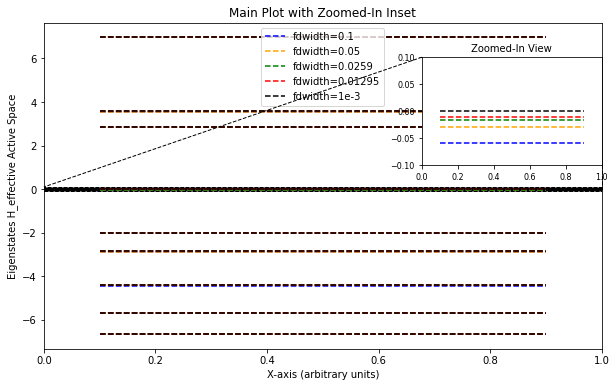

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes

# Define the fdwidth values to plot
fdwidths = ['0.1', '0.05', '0.0259', '0.01295', '1e-3']

# Define a colormap or custom colors for the fdwidth values
colors = ['blue', 'orange', 'green', 'red', 'black']  # One color per fdwidth

# Create the main plot
fig, ax_main = plt.subplots(figsize=(10, 6))
for idx, fdwidth in enumerate(fdwidths):
    file_path = f"fdwidth_{fdwidth}/output/eigvals_Heff.npy"
    eigvals = np.load(file_path)

    # Plot eigenvalues as horizontal lines with a unique color
    for eig in eigvals:
        ax_main.axhline(eig, xmin=0.1, xmax=0.9, linestyle='--', color=colors[idx],
                        label=f"fdwidth={fdwidth}" if eig == eigvals[0] else "")

# Set labels and title for the main plot
ax_main.set_ylabel("Eigenstates H_effective Active Space")
ax_main.set_xlabel("X-axis (arbitrary units)")
ax_main.set_title("Main Plot with Zoomed-In Inset")
ax_main.legend()

# Create a zoomed-in inset that appears "outside" the main plot
ax_inset = fig.add_axes([0.65, 0.55, 0.25, 0.25])  # Define inset position as [left, bottom, width, height] in figure coordinates
for idx, fdwidth in enumerate(fdwidths):
    file_path = f"fdwidth_{fdwidth}/output/eigvals_Heff.npy"
    eigvals = np.load(file_path)

    # Plot eigenvalues as horizontal lines with a unique color
    for eig in eigvals:
        ax_inset.axhline(eig, xmin=0.1, xmax=0.9, linestyle='--', color=colors[idx])

# Set limits and labels for the zoomed-in inset
ax_inset.set_ylim(-0.1, 0.1)
ax_inset.set_title("Zoomed-In View", fontsize=10)
ax_inset.tick_params(axis='both', which='major', labelsize=8)

# Highlight the zoomed-in region on the main plot
mark_inset(ax_main, ax_inset, loc1=2, loc2=4, color="black", linestyle="--")

# Show the plot

plt.show()


/apps/daint/UES/jenkins/7.0.UP03/21.09/daint-mc/software/jupyterlab/3.2.8-CrayGNU-21.09-batchspawner/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/apps/daint/UES/jenkins/7.0.UP03/21.09/daint-mc/software/jupyterlab/3.2.8-CrayGNU-21.09-batchspawner/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


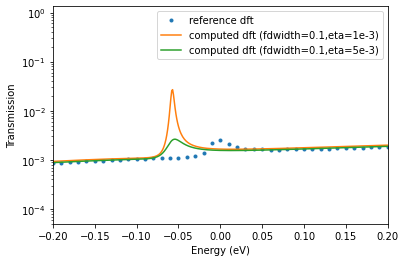

In [6]:
# Load the reference LCAO transmission data
Eref, Tref_dft = np.load("reference/ET_dft.npy")

# Plot the reference DFT data
plt.plot(Eref, Tref_dft, '.', label="reference dft")

# Define the fdwidth values to plot
fdwidths = [0.1]
etas = ['1e-3', '5e-3']
# Loop over each fdwidth and plot the computed transmission data
for fdwidth in fdwidths:
    for eta in etas:
        file_path = f"fdwidth_{fdwidth}/output/eta_{eta}/dft_transmission.npy"
        E, T = np.load(file_path)
        plt.plot(E, T, label=f"computed dft (fdwidth={fdwidth},eta={eta})")

# Set the y-axis to a logarithmic scale to better visualize the transmission data
plt.yscale("log")
plt.xlim(-0.2, 0.2)
plt.ylim(bottom=5e-5)

# Add legend and labels
plt.legend()
plt.xlabel("Energy (eV)")
plt.ylabel("Transmission")

# Show the plot
plt.show()


Reference DFT Peak: Position = -0.0000 eV, Height = 2.5929e-03
Computed DFT (fdwidth=1e-3) Peak: Position = 0.0040+0.0050j eV, Height = 2.7427e-03+0.0000e+00j
Computed DFT (fdwidth=5e-4) Peak: Position = 0.0030+0.0050j eV, Height = 2.7263e-03+0.0000e+00j


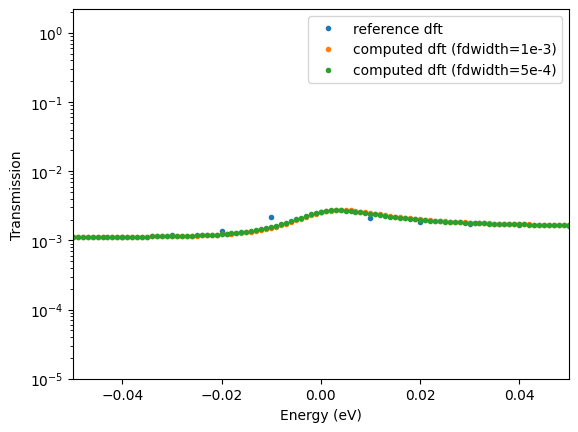

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load the reference LCAO transmission data
Eref, Tref_dft = np.load("reference/ET_dft.npy")

# Define the fdwidth values to plot
fdwidths = ['1e-3','5e-4']

# Create a function to find the peak position and height within a given x range
def find_peak(E, T, xlim):
    mask = (E >= xlim[0]) & (E <= xlim[1])
    if np.any(mask):
        max_idx = np.argmax(T[mask])
        peak_height = T[mask][max_idx]
        peak_position = E[mask][max_idx]
        return peak_position, peak_height
    else:
        return None, None

# Find and print the peak for the reference data
ref_peak_position, ref_peak_height = find_peak(Eref, Tref_dft, (-0.2, 0.2))
print(f"Reference DFT Peak: Position = {ref_peak_position:.4f} eV, Height = {ref_peak_height:.4e}")

# Plot the reference DFT data
plt.plot(Eref, Tref_dft, '.' ,label="reference dft")

# Loop over each fdwidth and plot the computed transmission data
for fdwidth in fdwidths:
    file_path = f"fdwidth_{fdwidth}/output/dft_transmission.npy"
    E, T = np.load(file_path)

    # Find and print the peak for the computed data
    computed_peak_position, computed_peak_height = find_peak(E, T, (-0.2, 0.2))
    print(f"Computed DFT (fdwidth={fdwidth}) Peak: Position = {computed_peak_position:.4f} eV, Height = {computed_peak_height:.4e}")

    plt.plot(E, T, '.' ,label=f"computed dft (fdwidth={fdwidth})")

# Set the y-axis to a logarithmic scale to better visualize the transmission data
plt.yscale("log")
plt.xlim(-0.05, 0.05)
plt.ylim(bottom=1e-5)

# Add legend and labels
plt.legend()
plt.xlabel("Energy (eV)")
plt.ylabel("Transmission")

# Show the plot
plt.show()
